# Covid-19 Data Analysis with Coursera

### Importing packages 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
print ('Modules are imported.')

Modules are imported.


### Importing covid-19 dataset 

In [84]:
#Note: Dataset downloaded on 31st August 2020 

In [3]:
covid_dataset_csv = pd.read_csv("datasets/time_series_covid19_confirmed_global.csv")
covid_dataset_csv.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624


### Checking the shape of the dataframe 

In [4]:
covid_dataset_csv.shape

(266, 226)

### Delete useless columns 

In [5]:
covid_dataset_csv.drop(["Lat","Long"], axis =1, inplace = True)

In [6]:
    covid_dataset_csv.head(2)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162
1,NaN,Albania,0,0,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380


### Aggregating Rows by Country

In [7]:
covid_aggregated = covid_dataset_csv.groupby("Country/Region").sum()

In [90]:
covid_aggregated.shape

(188, 222)

In [91]:
covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162
Albania,0,0,0,0,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380
Algeria,0,0,0,0,0,0,0,0,0,0,...,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146
Andorra,0,0,0,0,0,0,0,0,0,0,...,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124
Angola,0,0,0,0,0,0,0,0,0,0,...,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624


### Visualising data related to a country - China, France, Italy, Japan

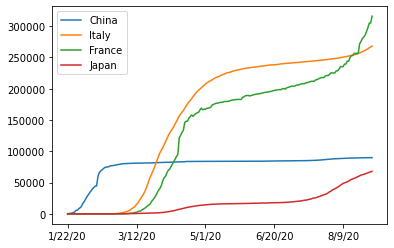

In [92]:
covid_aggregated.loc['China'].plot()
covid_aggregated.loc['Italy'].plot()
covid_aggregated.loc['France'].plot()
covid_aggregated.loc['Japan'].plot()
plt.legend()

In [94]:
#calculating a good measure 
#calculating the first derivative of the curve
#find max infection rate for China
#find max for all countries 
#create new frame with only max rate
#create new dataframe with only the max and country

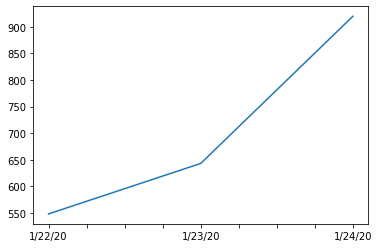

In [109]:
#first 30 days only in India
covid_aggregated.loc["China"][:3].plot()

In [110]:
covid_aggregated.loc["China"].diff()

1/22/20      NaN
1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
           ...  
8/26/20     32.0
8/27/20     30.0
8/28/20     22.0
8/29/20     27.0
8/30/20     32.0
Name: China, Length: 222, dtype: float64

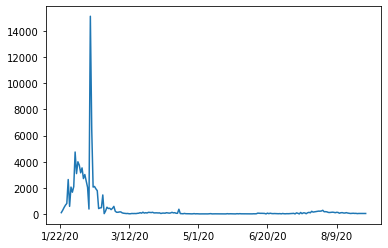

In [111]:
covid_aggregated.loc["China"].diff().plot()

In [112]:
covid_aggregated.loc["China"].diff().max()

15136.0

In [54]:
countries = list(covid_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid_aggregated.loc[c].diff().max())
covid_aggregated["Max Infection Rate"] = max_infection_rates

In [55]:
covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,Max Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37953,37999,38054,38070,38113,38129,38140,38143,38162,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,8275,8427,8605,8759,8927,9083,9195,9279,9380,178.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,41068,41460,41858,42228,42619,43016,43403,43781,44146,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,1045,1045,1060,1060,1098,1098,1124,1124,1124,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2134,2171,2222,2283,2332,2415,2471,2551,2624,100.0


In [56]:
covid_max_only = pd.DataFrame(covid_aggregated["Max Infection Rate"])
covid_max_only.head()

,Max Infection Rate
Country/Region,
Afghanistan,915.0
Albania,178.0
Algeria,675.0
Andorra,79.0
Angola,100.0


In [57]:
happiness_data = pd.read_csv("datasets/worldwide_happiness_report.csv")
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [58]:
#import the happiness dataset
#drop useless columns 
#reset index
#join datasets 
#check correlation between variables 

Useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [59]:
happiness_data.drop(Useless_cols, axis = 1, inplace = True)

In [60]:
happiness_data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [61]:
happiness_data.set_index(['Country or region'], inplace = True)

In [62]:
#Checking shape of both dataframes before joining

In [63]:
covid_max_only.shape

(188, 1)

In [64]:
covid_max_only.head()

,Max Infection Rate
Country/Region,
Afghanistan,915.0
Albania,178.0
Algeria,675.0
Andorra,79.0
Angola,100.0


In [65]:
happiness_data.shape

(156, 4)

In [66]:
happiness_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [67]:
#Because the happiness data is 156 rows while the covid is 188, we need to join the happiness to the covid set implying that for some countries we simply won't have happiness data and these would be null values
data = covid_max_only.join(happiness_data, how="inner")
data.head()

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,178.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,11717.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283


In [68]:
data.corr()

,Max Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max Infection Rate,1.000000,0.091766,0.051704,0.082681,0.086952
GDP per capita,0.091766,1.000000,0.757521,0.859431,0.394799
Social support,0.051704,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.082681,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.086952,0.394799,0.456317,0.423146,1.000000


### Visualising the data 

In [69]:
#GDP against max infection rate 
#Social Support against max infection rate 
#Healthy Life Exp against max infection rate 
#Freedom against max infection rate 

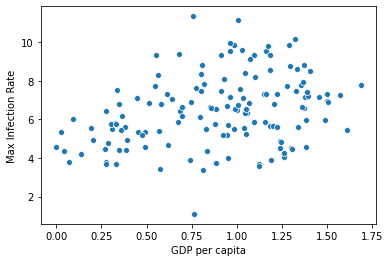

In [70]:
x = data["GDP per capita"]
y = data["Max Infection Rate"]
sns.scatterplot(x,np.log(y))

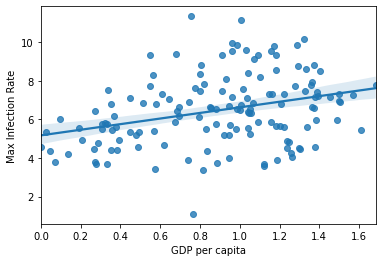

In [71]:
sns.regplot(x, np.log(y))

In [72]:
x2 = data['Social support']
x3 = data['Healthy life expectancy']
x4 = data['Freedom to make life choices']

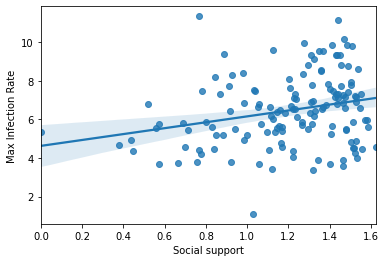

In [73]:
#Graphing remaining variables
sns.regplot(x2,np.log(y))

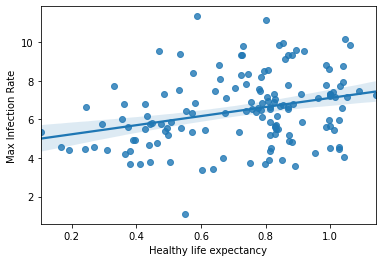

In [74]:
sns.regplot(x3,np.log(y))

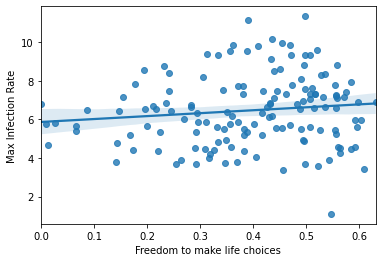

In [75]:
sns.regplot(x4,np.log(y))

## Extension beyond guided project 

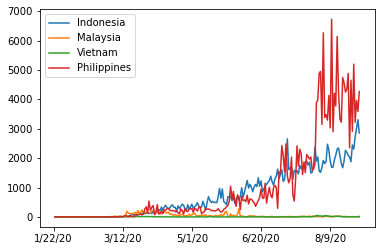

In [107]:
#Selected SEA countries
covid_aggregated.loc["Indonesia"].diff().plot()
covid_aggregated.loc["Malaysia"].diff().plot()
covid_aggregated.loc["Vietnam"].diff().plot()
covid_aggregated.loc["Philippines"].diff().plot()
plt.legend()

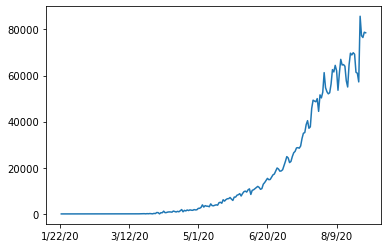

In [113]:
covid_aggregated.loc["India"].diff().plot()

In [118]:
India_overtime = pd.DataFrame(covid_aggregated.loc["India"])

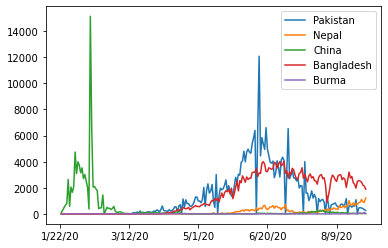

In [132]:
#Plot all countries bordering India 
covid_aggregated.loc["Pakistan"].diff().plot()
covid_aggregated.loc["Nepal"].diff().plot()
covid_aggregated.loc["China"].diff().plot()
covid_aggregated.loc["Bangladesh"].diff().plot()
covid_aggregated.loc["Burma"].diff().plot()
plt.legend()

In [129]:
#Listing all countries in the Covid-19 Database
list(covid_aggregated.index)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [135]:
#Getting India State-wide Data
covid_dataset_csv.set_index("Country/Region")

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162
Albania,NaN,0,0,0,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124
Angola,NaN,0,0,0,0,0,0,0,0,0,...,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,0,0,0,0,0,0,0,0,0,...,18313,18476,18802,19213,19678,20155,20677,21251,21668,22204
Western Sahara,NaN,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,NaN,0,0,0,0,0,0,0,0,0,...,1906,1907,1911,1916,1924,1930,1933,1943,1946,1953


In [ ]:
#try this with countries that India had open flight routes for